# Python - Exploratory Data Analysis on the Titanic Dataset

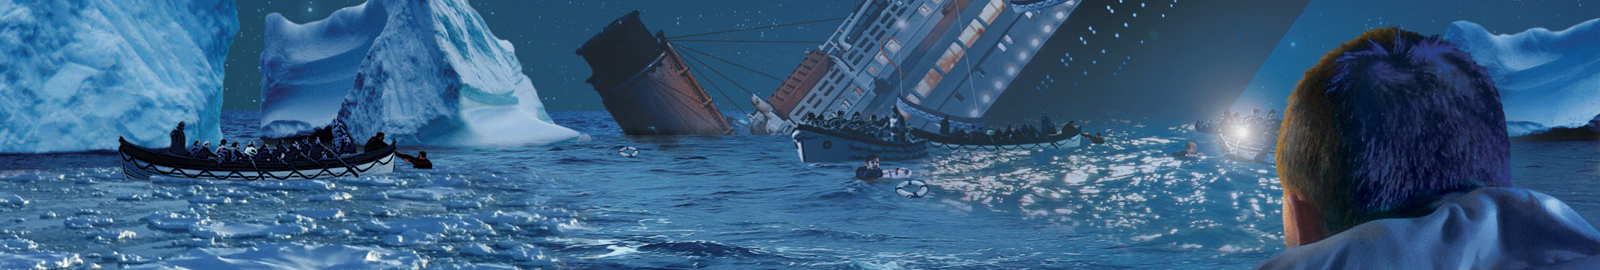

Dataset: Titanic Train Dataset (Source: https://www.kaggle.com/c/titanic/data?select=train.csv)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part I: Exploratory analysis

* Read the dataset correctly using pandas, using an appropriate column as index 
* Compute the percentage of survivors out of total number of passengers and the percentage of men and women out of total number of passengers
* Compute the percentage of survivors by sex (i.e. the percentage of male passengers that survived and female passengers that survived) and the sex distribution of survivors (i.e. percentage of survivors that were men and percentage of survivors that were women) 
* Display in a 2 x 2 DataFrame the probability of being male/female and surviving/not surviving


### Question 1: Read the dataset correctly using pandas, using an appropriate column as index

In [4]:
df = pd.read_csv("train.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### ** INSERT: Quick Overview of the Data Set **
Before going into answering some of the more detailed questions, let's start off with a quick analysis of the dataset by using the shape-function and collecting information on datatypes, missing values, unique values and the number of observations in a dataframe called df_info. We see that the dataset has **891 rows and 11 columns** of which 6 are of numerical type and 5 of categorical type. 
Additionally, most columns are complete with 3 exceptions: 
- **Age** (177 missing values) 
- **Cabin** (687 missing values) 
- **Embarked** (2 missing values) 

We will have a closer look at the missing values in the Age column in the second Part of this notebook. 

In [5]:
# Get number of rows and columns of the dataframe
df.shape 

(891, 11)

In [6]:
# Construct a dataframe with the metainfo of the dataset
df_info = pd.DataFrame(df.dtypes)
df_info["missing"] = df.isnull().sum()
df_info["unique"] = df.nunique()
df_info["count"] = df.count()
df_info

,0,missing,unique,count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


We realize that the variables "Survived" and "PClass" were imported as numerical types. For some applications, e.g. LInear Regression, it is important to mark those variables as flag-variables (categoricals with levels) to avoid the algorithm mis-interpreting the levels (e.g. 0=Not Survived) as actual number-values with a hierarchy (e.g. 0<1). Here, we will skip this step for now.  

We will also have a quick look at the statistical properties of our dataset and will do so separately for numerical and for categorical datatypes.

In [7]:
# Analyze dataset - numerical datatypes
df.describe(include=["number"])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Analyze dataset - numerical datatypes
df.describe(include=["object"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Brocklebank, Mr. William Alfred",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
pd.set_option("precision", 2) # Change precision of float numbers from 6 to 3 digits

---

## Exercices Part 1

In the following we have a closer look at survival rates of the Titanic tragedy in general and by gender. There are several different methods to calculate rates and we will present a selection of these:

### Question 2a: Percentage of survivors out of total number of passengers

The simplest way to get the percentage of survivors is to define the number of passengers and the number of survivors and to store each result in a separate variable. For the number of survivors we can make use of the fact that our filtering criteria is =1 (while the non-survivors are marked with 0) and thus take the sum of the column as the number of survivors. If this was not the case, we would need to apply filtering with count. 
To calculate the percentage of survivors we take the ratio of these two variables:

In [10]:
# Option 1: Define number of survivors (Survived = 1) and number of passengers
passengers = len(df) 
survivors = df["Survived"].sum() 

perc_survivors = round(survivors/passengers*100,2)

print("Only", perc_survivors,"% of all passengers on the Titanic survived the tragedy.")

Only 38.38 % of all passengers on the Titanic survived the tragedy.


However, since we are going to look at survival rates for different groups (e.g. by gender, by survivors only,etc.), we would create a lot of new variables and code if we were using this approach for each calculation. 
Thus, we are looking for a simpler approach, for example storing the required values in a dataframe which we can then conveniently refer to: For this, we will make use of the Panda Crosstab function: 

In [11]:
# Option 2: Crosstab survival numbers by gender (absolute numbers)
df_survivors = pd.crosstab(df["Survived"], df["Sex"], normalize=False, margins=True, margins_name="Total")
df_survivors

Sex,female,male,Total
Survived,,,
0,81,468,549
1,233,109,342
Total,314,577,891


In [12]:
#Get total number of Survivors and total number of Passengers 
round(df_survivors.iloc[1,2]/df_survivors.iloc[2,2]*100,2) 

38.38

We can even skip above step by using the "normalize=True" option of the crosstab method, which gives us the results in % values (multiplied by 100).

In [13]:
# Option 3: Crosstab survival numbers (percentage values)
pd.crosstab(df["Survived"], df["Sex"], normalize=True, margins=True, margins_name="Total")*100

Sex,female,male,Total
Survived,,,
0,9.09,52.53,61.62
1,26.15,12.23,38.38
Total,35.24,64.76,100.00


All three methods yield the same result: **only 38.4% of the passengers on the Titanic survived** the tragedy. 

### Question 2b: Percentage of men and women out of total number of passengers

Finally, to get the ratio between the different levels of a variable, we can also use the value_counts method with the normalize option. It gives us the same result as the above crosstable table, which is that **65% of the passengers on the Titanic were male and 35% were female**

In [14]:
# Ratio of Male vs. Female passengers on the Titanic (in %)
df["Sex"].value_counts(normalize=True)

male      0.65
female    0.35
Name: Sex, dtype: float64

### Question 3a Percentage of survivors by sex (i.e. the percentage of male passengers that survived and female passengers that survived)

To calculate this, let us first define the number of passengers and survivors by sex: 

In [15]:
# Calculating absolute number of passengers and survivors by gender
male_passengers = df[df["Sex"]=="male"].count()["Name"]
female_passengers = df[df["Sex"]=="female"].count()["Name"]

num_male_survivors = df[(df["Sex"]=="male") & (df["Survived"] == 1)].count()["Survived"]
num_female_survivors = df[(df["Sex"]=="female") & (df["Survived"] == 1)].count()["Survived"]

In [16]:
# Calculating the ratio for male and female survivors
perc_male_survivors = round(num_male_survivors/male_passengers*100,1)
perc_female_survivors = round(num_female_survivors/female_passengers*100,1)

print(perc_female_survivors,"% of female passengers survived,while only", \
      perc_male_survivors,"% of male passengers survived.")

74.2 % of female passengers survived,while only 18.9 % of male passengers survived.


### Question 3b: Sex distribution of survivors (i.e. percentage of survivors that were men and percentage of survivors that were women)

To calculate the gender-ratio of the survivors, we can again use the value_counts function with a condition:

In [17]:
# Using value_counts to return the ratio
df[df["Survived"]==1]["Sex"].value_counts(normalize=True)

female    0.68
male      0.32
Name: Sex, dtype: float64

The resulting series can be stored so that it can be indexed or subsetted for further calculations.

### Question 4a: Display in a 2 x 2 DataFrame the probability of being male/female and surviving/not surviving

There are again several options to achieve this task. A simple method is to create a dataframe from scratch by filling it with pre-calculated values. In this case, we use the above created variables to calculate the probabilities, then store them in a dictionary and finally create a dataframe with the values in the dictionary. This can be an option for few values, as in this case, however for larger dataframes it is recommend to use simpler code.  

In [18]:
# Option 1: Create a dataframe from a dictionary
# Creating probabilities p
p_female_survivor = num_female_survivors / len(df)
p_female_nonsurvivor = (female_passengers-num_female_survivors) / len(df)
p_male_survivor = num_male_survivors / len(df)
p_male_nonsurvivor = (male_passengers-num_male_survivors) / len(df)


# Creating a dictionary with the probabilities
data = {"female": [p_female_nonsurvivor,p_female_survivor],
       "male": [p_male_nonsurvivor,p_male_survivor]
       }
# Creating the dataframe with the previously created dictionary values as columns
df_prob = pd.DataFrame(data, columns = ["female","male"], index = ["not survived","survived",])

df_prob

,female,male
not survived,0.09,0.53
survived,0.26,0.12


##### A more elegant way to achieve the same result is to use the Panda functions Crosstab or Pivot_table:

In [19]:
pd.crosstab(df["Survived"], df["Sex"], normalize=True, margins=False)

Sex,female,male
Survived,,
0,0.09,0.53
1,0.26,0.12


In [20]:
df[["Sex","Survived"]].pivot_table(index="Survived", 
                                   columns="Sex", 
                                   aggfunc=len, 
                                   margins=False)/len(df)

Sex,female,male
Survived,,
0,0.09,0.53
1,0.26,0.12


### Question 4b: Display in a DataFrame the probability of survival/not survival of all combinations of sex and class

Here, we will use the above created pivot_table, this time including also "PClass". For improved visibility, I included the Row- and Column-Total by using the margins=True option.

In [21]:
df[["Sex","Survived","Pclass"]].pivot_table(index=["Sex","Pclass"], 
                                            columns=["Survived"], 
                                            aggfunc=len, 
                                            margins=True,
                                            margins_name="Total")/len(df)*100

Survived           0      1   Total
Sex    Pclass                      
female 1        0.34  10.21   10.55
       2        0.67   7.86    8.53
       3        8.08   8.08   16.16
male   1        8.64   5.05   13.69
       2       10.21   1.91   12.12
       3       33.67   5.27   38.95
Total          61.62  38.38  100.00

---

# Part II: Imputing missing values

In this part, we are going to come up with a **strategy to impute the missing values in the age column**. This is an important part of any Data Preparation for Machine learning since many algorithms cannot deal with missing data and those rows would have to be dropped, thereby at the risking to lose important information.

### Analyzing Age
Let's first have a better understanding of the age column and missing values. We start by plotting age and then assess the missing values:

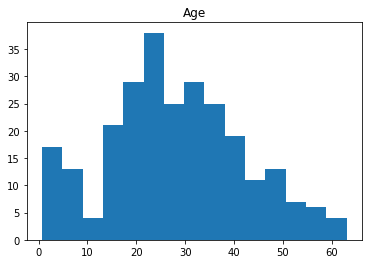

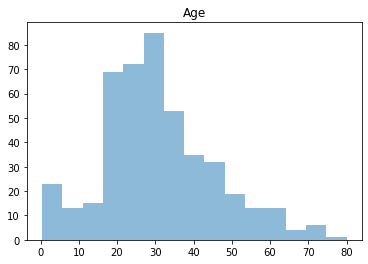

In [22]:
# Plot Age for Female (top) and for Male passengers )(bottom)
df_females = df[(df["Sex"]=="female")]
df_males = df[(df["Sex"]=="male")]

df_females[["Age"]].dropna().hist(bins=15, grid=False);
df_males[["Age"]].dropna().hist(bins=15, grid=False, alpha = 0.5);

In [23]:
# Analyzing how many null-values we have per Pclass by Gender
df["Age_isnull"] = df["Age"].isnull()
df.groupby(["Pclass","Sex"])["Age_isnull"].agg(["sum"]).unstack()

sum      
Sex    female  male
Pclass             
1         9.0  21.0
2         2.0   9.0
3        42.0  94.0

### What are some possible approaches to impute those missing values?

| Idea | Pro's | Con's |
| --- | --- | --- |
| **(1) Fill missing values with random values** | Quick | Not taking into consideration actual age distribution |
| **(2) Use Python internal impute method** | Quick | Out of scope for this assignment |
| **(3) Use backfill or forward fill** | Quick  | High inaccuracy |
| **(4) Fill missing values with average age of the dataset** | Quick, accounts for actual age distribution | Not accounting for differences between subgroups & impacted by extreme values |
| **(5) Fill missing values with median age of the dataset** | Quick, accounts for actual age distribution | Not accounting for differences between subgroups|
| **(6) Find similar groups and fill missing values with median age per subgroup (e.g. by gender, by passenger class)** | Accounts for differences between different groups, more accurate  | Complex, not taking into consideration further information such as traveling with or without parents |
| **(7) Derive possible age by establishing relationships (e.g. wife-husband, children vs. parents)** | Higher accuracy  | High complexity |
| **(8) Derive possible age from name-title** | Higher accuracy  | High complexity |
| **(9) Use machine learning techniques to estimate age** | High accuracy  | Out of scope of this analysis|
| **(10) Further....** | ...  | ...|


### Approach 1: Imputing missing values with the median per passenger class (by gender)

In [24]:
df.groupby(["Pclass","Sex"])["Age"].agg(["mean","median","max","min"]).unstack()

mean        median          max          min      
Sex    female   male female  male female  male female  male
Pclass                                                     
1       34.61  41.28   35.0  40.0   63.0  80.0   2.00  0.92
2       28.72  30.74   28.0  30.0   57.0  70.0   2.00  0.67
3       21.75  26.51   21.5  25.0   63.0  74.0   0.75  0.42

We have a look at the mean and median values per gender and per passenger class and decide to **impute the missing values of the age column with the median age per passenger class and per gender**. The idea behind this approach is that we try to find subgroups which are as similar as possible and then use the median as a fair age estimator within this subgroup. Of course, there are several other factors besides gender and passenger-class from which we could deduct an even better estimate of the real age, such as whether someone is travelling with parents, whether someone is married or not, etc. however in this example we will focus only on those two factors in order to keep the analysis concise and pragmatic. 

To avoid repeating the code for each of these six groups, we will make use of for-loops: first, to store the median values per subgroup in a numpy array and then to fill the missing values in each subgroup with the median ages stored in the numpy array:

In [25]:
# Factorize "Sex" as 0 and 1 to apply the range() function in the next step
df["gender"] = df["Sex"].map( {"female": 0, "male": 1} ).astype(int)

In [26]:
# Create a table that stores the median age values per passenger class

median_age = np.zeros((2,3), dtype=int) #create a numpy array filled with zeros

# Calculate the median age per gender and per Pclass and store it in the median_age array
for i in range(0,2):
    for j in range(0,3):
        median_age[i,j] = df[(df["gender"] == i) & (df["Pclass"] == j+1)]["Age"].dropna().median()
 
median_age

array([[35, 28, 21],
       [40, 30, 25]])

In [27]:
# Create a new column "Age_filled" in which we will store the imputed values to preserve the original column "Age"
df["Age_filled"] = df["Age"] 

In [28]:
# Replace the missing age values with the median per pclass and per sex as calculated in the previous approach 
for i in range(0,2):
    for j in range(0,3):
        df.loc[(df["Age"].isnull()) & (df["gender"]==i) & (df["Pclass"] == j+1), "Age_filled"] = median_age[i,j]

We are done! Checking this we see that NaN-Values of the column Age have been filled with the previously estimated Median values in the newly created column Age_filled. 

In [29]:
df[df["Age"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_isnull,gender,Age_filled
PassengerId,,,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q,True,1,25.0
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.00,NaN,S,True,1,30.0
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.22,NaN,C,True,0,21.0
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.22,NaN,C,True,1,25.0
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.88,NaN,Q,True,0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.23,NaN,C,True,1,25.0
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,True,0,21.0
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.50,NaN,S,True,1,25.0


### Approach 2: Let's try another solution using the Titles in the Names to derive the age

Another option is to use the title provided in the name columns to derive the possible age of the passengers. This approach is based on the fact that certain titles are associated with a certain age, e.g. the title of Master is given to young male children, whereas male adults are called Mister. One Remark: the title Miss can be used both for female children as well as for unmarried children. For the sake of simplicity, we will however not make this distinction here.

We will extract in the following the titles from the names and compute median ages based on the title, the passenger class and sex.

In [30]:
# Extracting the Titles from the Name column and storing in an additional column "Title"
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [31]:
# Checking how many Titles have missing values
titles_missing_age = df.groupby(['Sex','Title', ])['Age_isnull'].agg(['sum'])
titles_missing_age[titles_missing_age["sum"]>0]

sum
Sex    Title        
female Miss     36.0
       Mrs      17.0
male   Dr        1.0
       Master    4.0
       Mr      119.0

In [32]:
# median, mean age by Title & Sex + count
df.groupby(["Sex","Title","Pclass" ])["Age"].agg(["median","mean", "count"])

median   mean  count
Sex    Title    Pclass                      
female Countess 1         33.0  33.00      1
       Dr       1         49.0  49.00      1
       Lady     1         48.0  48.00      1
       Miss     1         30.0  30.00     45
                2         24.0  22.39     32
                3         18.0  16.12     69
       Mlle     1         24.0  24.00      2
       Mme      1         24.0  24.00      1
       Mrs      1         41.5  40.88     34
                2         32.0  33.68     41
                3         31.0  33.52     33
       Ms       2         28.0  28.00      1
male   Capt     1         70.0  70.00      1
       Col      1         58.0  58.00      2
       Don      1         40.0  40.00      1
       Dr       1         44.0  42.00      3
                2         38.5  38.50      2
       Jonkheer 1         38.0  38.00      1
       Major    1         48.5  48.50      2
       Master   1          4.0   5.31      3
                2          1.0   2.26      9
                3          4.0   5.35     24
       Mr       1         40.0  41.58     87
                2         31.0  32.77     82
                3         26.0  28.72    229
       Rev      2         46.5  43.17      6
       Sir      1         49.0  49.00      1

Analyzing median and mean age by Title and passenger class it becomes obvious that there is large differences between different titles within one gender, for example this confirms that the title Master is reserved for small children only. This observation would have been missed previously when only looking at Passenger class and Gender. We also observe that the average age of passengers is decreasing with lower passenger classes.


Next, we have a look at how many missing age values there are per title and it becomes obvious that only for five titles age values are missing and that this mainly affects 3rd class passengers:

In [33]:
# Checking how many Titles have missing values
titles_missing_age = df.groupby(["Title", "Pclass"])["Age_isnull"].agg(["sum"])
titles_missing_age[titles_missing_age["sum"]>0]

sum
Title  Pclass      
Dr     1        1.0
Master 3        4.0
Miss   1        1.0
       2        2.0
       3       33.0
Mr     1       20.0
       2        9.0
       3       90.0
Mrs    1        8.0
       3        9.0

It is time to impute the missing values based on the median age per  Title, Sex and Passenger class:

In [34]:
# Create new column to fill ages imputed from title: "Age_filled_by_title"
df["Age_filled_by_title"] = df["Age"]

# Impute median age values by Title
df["Age_filled_by_title"].fillna(df.groupby(["Pclass","Sex","Title"])["Age_filled_by_title"].transform("median"), inplace=True)

In [35]:
df[df["Age"].isnull()].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_isnull,gender,Age_filled,Title,Age_filled_by_title
PassengerId,,,,,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q,True,1,25.0,Mr,26.0
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.00,NaN,S,True,1,30.0,Mr,31.0
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.22,NaN,C,True,0,21.0,Mrs,31.0
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.22,NaN,C,True,1,25.0,Mr,26.0
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.88,NaN,Q,True,0,21.0,Miss,18.0


   ### Finally, let's compare the two approaches:

In [36]:
# Check if there is any missing values for the two created age columns:
df.isnull().sum()

Survived                 0
Pclass                   0
Name                     0
Sex                      0
Age                    177
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                  687
Embarked                 2
Age_isnull               0
gender                   0
Age_filled               0
Title                    0
Age_filled_by_title      0
dtype: int64

In [37]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,Age_filled,Age_filled_by_title
count,891.00,891.00,714.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20,0.65,29.09,29.14
std,0.49,0.84,14.53,1.10,0.81,49.69,0.48,13.32,13.50
min,0.00,1.00,0.42,0.00,0.00,0.00,0.00,0.42,0.42
25%,0.00,2.00,20.12,0.00,0.00,7.91,0.00,21.00,21.00
50%,0.00,3.00,28.00,0.00,0.00,14.45,1.00,26.00,26.00
75%,1.00,3.00,38.00,1.00,0.00,31.00,1.00,36.00,36.75
max,1.00,3.00,80.00,8.00,6.00,512.33,1.00,80.00,80.00


In [38]:
df.groupby(["Sex","Pclass" ])["Age","Age_filled","Age_filled_by_title"].agg(["median","mean"])

<ipython-input-38-22efd41adb6b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Sex","Pclass" ])["Age","Age_filled","Age_filled_by_title"].agg(["median","mean"])


Age        Age_filled        Age_filled_by_title       
              median   mean     median   mean              median   mean
Sex    Pclass                                                           
female 1        35.0  34.61       35.0  34.65                35.0  35.15
       2        28.0  28.72       28.0  28.70                28.0  28.60
       3        21.5  21.75       21.0  21.53                18.0  21.47
male   1        40.0  41.28       40.0  41.06                40.0  41.09
       2        30.0  30.74       30.0  30.68                31.0  30.76
       3        25.0  26.51       25.0  26.10                26.0  26.12

##### To finalize, we can conclude that both methods yield very similar results with only very small differences between both methods (difference in mean is 0.05 years) and even to the original age column with the missing values (mean: 29.7).